# Prediction of electric power consumption by a nuclearpower plant

# by Moutasem Al-Nabulsi


In [87]:
# import libraries that we will use to work with

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

# First step would be to import data
read_file = pd.read_csv (r'/content/Data4prediction.txt', header = None)

# Convert txt into csv format
read_file.to_csv (r'/content/Data4prediction.csv', index=None)

# We succesfully converted the file into a CSV
df = pd.read_csv('/content/Data4Prediction CSV.csv')

df.head()

,x,Power
0,1,207.29325
1,2,207.84000
2,3,205.96200
3,4,205.96125
4,5,204.92325


In [88]:
# We notice that the index & x column are not in the same order
# we set the x column to be the index instead 
df1 = df.set_index('x')

In [89]:
df1.head()

,Power
x,
1,207.29325
2,207.84000
3,205.96200
4,205.96125
5,204.92325


In [90]:
df1.columns =['Power']
df1.head()

,Power
x,
1,207.29325
2,207.84000
3,205.96200
4,205.96125
5,204.92325


In [91]:
#x will represent no. of days, and power will be the amount recorded on that day

Modeling Task Steps

1- Consumption of power is the main target of study to predict the algorithim using Time-Series Analysis

2- Training & Test set
will be 70% of the data for training & 30% to predict future values

3- To meausure performance
using RMSE value 



In [92]:
import sklearn
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):    
  
  # Regression metrics
    
    explained_variance = metrics.explained_variance_score(y_true, y_pred)
   
    mean_absolute_error = metrics.mean_absolute_error(y_true, y_pred) 
   
    mse = metrics.mean_squared_error(y_true, y_pred) 
   
    mean_squared_log_error = metrics.mean_squared_log_error(y_true, y_pred)
    
    median_absolute_error = metrics.median_absolute_error(y_true, y_pred)
   
    r2 = metrics.r2_score(y_true, y_pred)
    
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [93]:
# creating new dataframe from power column
power_consumption = df1[['Power']]
# inserting new column with yesterday's consumption values
power_consumption.loc[:,'Yesterday'] = power_consumption.loc[:,'Power'].shift()
# inserting another column with difference between yesterday and day before yesterday's consumption values.
power_consumption.loc[:,'Yesterday_Diff'] = power_consumption.loc[:,'Yesterday'].diff()
# dropping NAs
power_consumption = power_consumption.dropna()

In [94]:
power_consumption.head(530)

,Power,Yesterday,Yesterday_Diff
x,,,
3,205.96200,207.84000,0.54675
4,205.96125,205.96200,-1.87800
5,204.92325,205.96125,-0.00075
6,205.13325,204.92325,-1.03800
7,206.25900,205.13325,0.21000
...,...,...,...
528,212.32875,214.95375,4.38375
529,211.18050,212.32875,-2.62500
530,208.40475,211.18050,-1.14825


Text(0.5, 1.0, 'Consumption Graph')

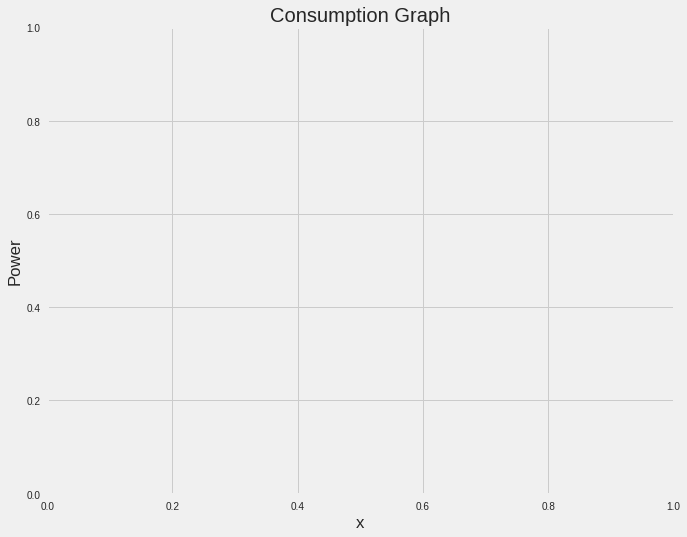

In [95]:
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

plt.xlabel("x")
plt.ylabel("Power")
plt.title("Consumption Graph")


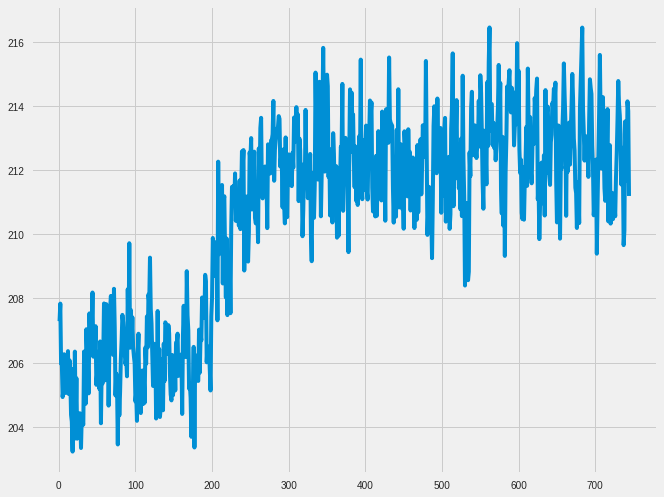

In [96]:
#Plot out power consumption
plt.plot(df1)

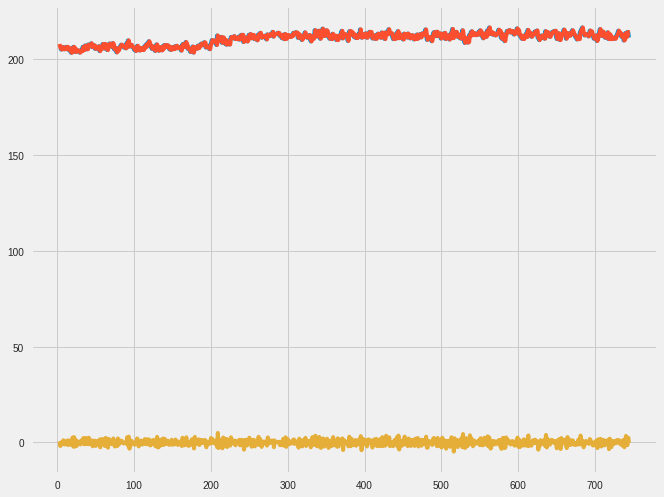

In [97]:
#Plot out power consumption plus 
plt.plot(power_consumption)

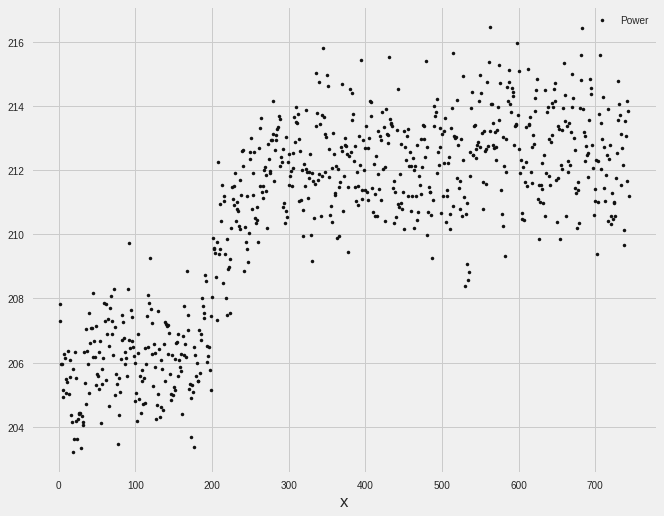

In [98]:
df1.plot(style='k.')
plt.show()

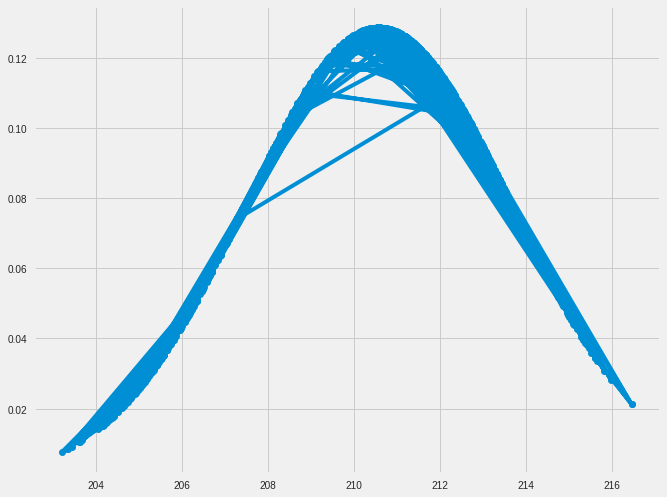

In [99]:
import scipy.stats as stats
import pylab as pl

# Plot between  0 and 1000 with .001 steps.
x_axis = np.arange(0, 1000, 0.001)
  
# Calculating mean and standard deviation
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)

fit = stats.norm.pdf(df1, np.mean(df1), np.std(df1))  
pl.plot(df1,fit,'-o')

pl.show()                


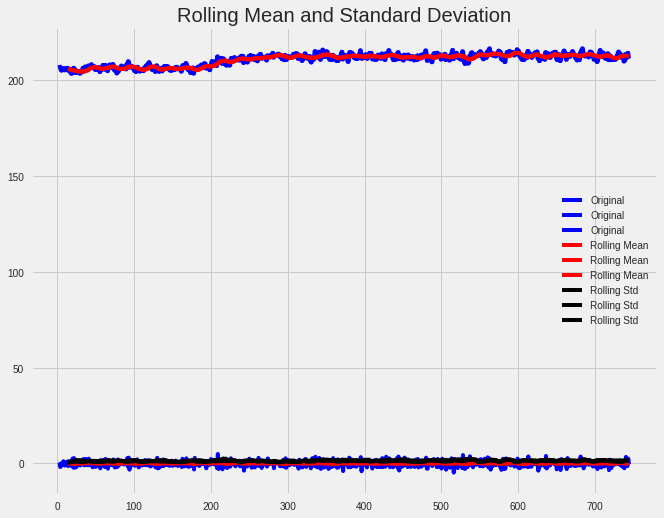

Results of dickey fuller test
Test Statistics                 -1.859530
p-value                          0.351332
No. of lags used                20.000000
Number of observations used    721.000000
critical value (1%)             -3.439452
critical value (5%)             -2.865557
critical value (10%)            -2.568909
dtype: float64


In [100]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    #perform dickey fuller test  
    print("Results of dickey fuller test")
    adft = adfuller(timeseries['Power'],autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(power_consumption)

In [101]:
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit

In [102]:
X_train = power_consumption[:744].drop(['Power'], axis = 1)
y_train = power_consumption.loc[:744, 'Power']

X_test = power_consumption[519:744].drop(['Power'], axis = 1)
y_test = power_consumption.loc[519:744, 'Power']

In [103]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, min_samples_leaf=10)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,test_size=0.2, random_state=42)

In [105]:
X_train[:520]

,Yesterday,Yesterday_Diff
x,,
484,211.48500,0.78675
295,210.96825,-1.68450
352,214.62525,-0.36075
177,206.49000,1.41675
138,206.59125,2.08050
...,...,...
272,211.84800,0.50400
204,209.54775,-0.01950
164,207.77175,0.93600


In [106]:
X_test[:744]

,Yesterday,Yesterday_Diff
x,,
123,206.26500,-0.96000
199,205.12875,-0.62775
339,211.71300,-2.06325
585,212.98125,1.04250
398,212.94075,1.84125
...,...,...
72,206.23725,-0.64500
226,210.21450,2.67375
134,204.60300,0.30225


In [107]:
!pip install pycaret
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [108]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [109]:
from pycaret.regression import *
power_consumption = setup(data = power_consumption, target = 'Power', session_id=123)

,Description,Value
0,session_id,123
1,Target,Power
2,Original Data,"(742, 3)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(519, 2)"


In [110]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.0933,1.9168,1.3804,0.7914,0.0065,0.0052,0.053
lr,Linear Regression,1.1070,1.8979,1.3706,0.7882,0.0065,0.0053,0.300
ridge,Ridge Regression,1.1070,1.8979,1.3706,0.7882,0.0065,0.0053,0.013
lar,Least Angle Regression,1.1070,1.8979,1.3706,0.7882,0.0065,0.0053,0.015
br,Bayesian Ridge,1.1072,1.8979,1.3706,0.7882,0.0065,0.0053,0.016
huber,Huber Regressor,1.1072,1.9162,1.3766,0.7850,0.0065,0.0052,0.024
gbr,Gradient Boosting Regressor,1.1062,1.9731,1.4005,0.7829,0.0066,0.0052,0.062
lightgbm,Light Gradient Boosting Machine,1.1335,2.0432,1.4225,0.7762,0.0067,0.0054,0.075
knn,K Neighbors Regressor,1.1295,2.0423,1.4231,0.7752,0.0067,0.0054,0.061
rf,Random Forest Regressor,1.1557,2.0911,1.4401,0.7709,0.0068,0.0055,0.459


In [111]:
models()


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [112]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2373,2.1392,1.4626,0.8179,0.0070,0.0059
1,1.1181,2.3027,1.5175,0.7309,0.0071,0.0053
2,1.2233,2.1821,1.4772,0.7798,0.0070,0.0058
3,0.9076,1.4060,1.1858,0.7745,0.0056,0.0043
4,1.1272,2.0550,1.4335,0.8416,0.0068,0.0054
5,1.0175,1.7574,1.3257,0.8147,0.0063,0.0048
6,0.9623,1.4436,1.2015,0.7497,0.0057,0.0046
7,1.1797,2.0009,1.4145,0.7760,0.0066,0.0056
8,1.0941,2.0162,1.4199,0.7812,0.0067,0.0052
9,1.0653,1.8645,1.3655,0.8482,0.0064,0.0051


In [113]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [114]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4475,3.0607,1.7495,0.7394,0.0083,0.0069
1,1.3247,2.9618,1.7210,0.6539,0.0081,0.0063
2,1.8418,5.2624,2.2940,0.4689,0.0108,0.0087
3,1.4897,3.1622,1.7783,0.4928,0.0084,0.0071
4,1.4990,3.5651,1.8881,0.7252,0.0089,0.0071
5,1.4650,3.1678,1.7798,0.6660,0.0084,0.0070
6,1.3822,2.8208,1.6795,0.5108,0.0079,0.0065
7,1.4102,3.0096,1.7348,0.6631,0.0082,0.0067
8,1.7262,4.3232,2.0792,0.5309,0.0098,0.0082
9,1.5597,3.5787,1.8918,0.7086,0.0089,0.0074


In [115]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2413,2.2531,1.5010,0.8082,0.0071,0.0059
1,1.1271,2.4864,1.5768,0.7094,0.0074,0.0053
2,1.1992,2.1158,1.4546,0.7865,0.0069,0.0057
3,0.9318,1.4177,1.1907,0.7726,0.0056,0.0044
4,1.1273,1.9925,1.4116,0.8464,0.0067,0.0054
5,0.9974,1.7348,1.3171,0.8171,0.0062,0.0047
6,0.9736,1.4449,1.2020,0.7494,0.0057,0.0046
7,1.1533,1.8188,1.3486,0.7964,0.0063,0.0055
8,1.0821,1.9637,1.4013,0.7869,0.0066,0.0051
9,1.0525,1.8835,1.3724,0.8466,0.0064,0.0050


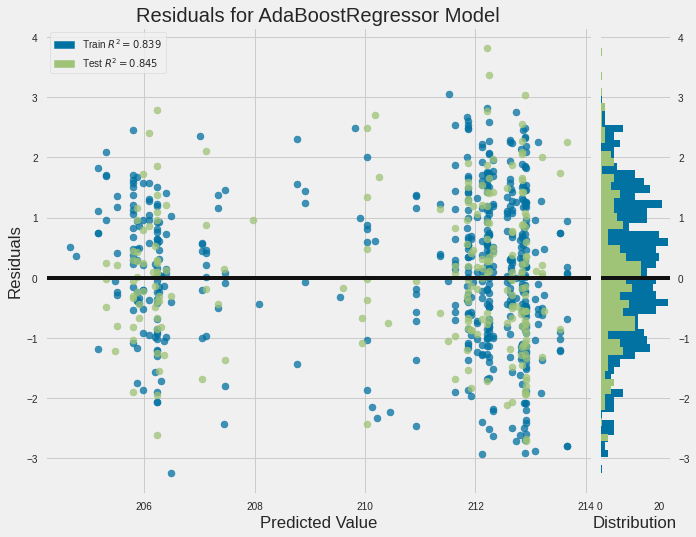

In [116]:
plot_model(ada)

In [117]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2736,2.0658,1.4373,0.8241,0.0068,0.0061
1,1.2286,2.8824,1.6978,0.6631,0.0080,0.0058
2,1.1961,2.0551,1.4336,0.7926,0.0068,0.0057
3,0.9281,1.5807,1.2573,0.7465,0.0059,0.0044
4,1.1027,1.8763,1.3698,0.8554,0.0065,0.0053
5,1.0923,1.9262,1.3879,0.7969,0.0066,0.0052
6,0.9639,1.3764,1.1732,0.7613,0.0055,0.0046
7,1.3067,2.4853,1.5765,0.7218,0.0074,0.0062
8,1.1471,2.1916,1.4804,0.7622,0.0070,0.0054
9,1.0955,1.9921,1.4114,0.8378,0.0066,0.0052


In [118]:
tuned_ada = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2458,2.0059,1.4163,0.8292,0.0067,0.0059
1,1.1414,2.4765,1.5737,0.7106,0.0074,0.0054
2,1.1349,1.8375,1.3555,0.8146,0.0064,0.0054
3,0.9454,1.4077,1.1865,0.7742,0.0056,0.0045
4,1.0674,1.7888,1.3375,0.8621,0.0063,0.0051
5,0.9192,1.4928,1.2218,0.8426,0.0058,0.0044
6,0.9744,1.4125,1.1885,0.7551,0.0056,0.0046
7,1.2268,2.2265,1.4921,0.7507,0.0070,0.0058
8,1.1124,1.9413,1.3933,0.7894,0.0066,0.0053
9,0.9828,1.7298,1.3152,0.8592,0.0062,0.0047


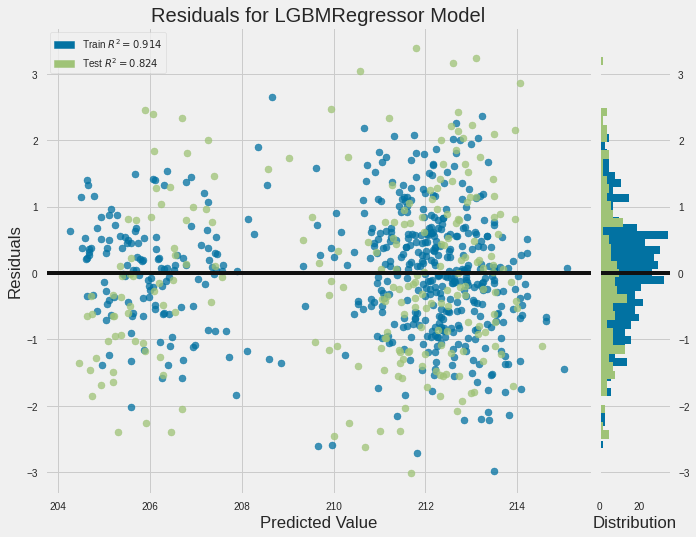

In [119]:
plot_model(lightgbm)

In [120]:
knn = create_model('knn')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2419,2.0671,1.4377,0.8240,0.0068,0.0059
1,1.1634,2.7641,1.6625,0.6770,0.0078,0.0055
2,1.2397,2.2182,1.4894,0.7761,0.0070,0.0059
3,1.0022,1.6078,1.2680,0.7421,0.0060,0.0047
4,1.0476,1.7065,1.3063,0.8685,0.0062,0.0050
5,1.0656,2.0134,1.4189,0.7877,0.0067,0.0051
6,0.9512,1.4561,1.2067,0.7475,0.0057,0.0045
7,1.2367,2.2935,1.5144,0.7432,0.0071,0.0058
8,1.2435,2.3876,1.5452,0.7409,0.0073,0.0059
9,1.1032,1.9088,1.3816,0.8446,0.0065,0.0052


In [121]:
print(knn)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')


In [122]:
tuned_knn = tune_model(knn)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.1429,1.6899,1.3000,0.8561,0.0062,0.0054
1,1.1235,2.3613,1.5367,0.7240,0.0072,0.0053
2,1.2084,2.1328,1.4604,0.7848,0.0069,0.0057
3,0.8916,1.2952,1.1381,0.7923,0.0054,0.0042
4,1.0433,1.7692,1.3301,0.8636,0.0063,0.0050
5,0.9360,1.4950,1.2227,0.8424,0.0058,0.0044
6,0.9911,1.5156,1.2311,0.7372,0.0058,0.0047
7,1.1838,2.0279,1.4240,0.7730,0.0067,0.0056
8,1.1515,2.0939,1.4470,0.7728,0.0068,0.0055
9,1.0332,1.8361,1.3550,0.8505,0.0064,0.0049


In [123]:
tuned_knn2 = tune_model(knn, n_iter = 50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.1493,1.7047,1.3057,0.8549,0.0062,0.0055
1,1.1225,2.3662,1.5382,0.7235,0.0072,0.0053
2,1.2071,2.1159,1.4546,0.7865,0.0069,0.0057
3,0.8946,1.2747,1.1290,0.7955,0.0053,0.0042
4,1.0477,1.7583,1.3260,0.8645,0.0063,0.0050
5,0.9244,1.4981,1.2240,0.8420,0.0058,0.0044
6,0.9796,1.4907,1.2210,0.7415,0.0058,0.0046
7,1.1856,2.0234,1.4225,0.7735,0.0067,0.0056
8,1.1407,2.0602,1.4353,0.7765,0.0068,0.0054
9,1.0425,1.8431,1.3576,0.8499,0.0064,0.0049


In [124]:
plot_model(tuned_knn, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,-1
n_neighbors,42
p,2
weights,distance


In [125]:
plot_model(tuned_knn2, plot = 'parameter')

,Parameters
algorithm,auto
leaf_size,30
metric,manhattan
metric_params,None
n_jobs,-1
n_neighbors,36
p,2
weights,distance


In [126]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.4475,3.0607,1.7495,0.7394,0.0083,0.0069
1,1.3247,2.9618,1.7210,0.6539,0.0081,0.0063
2,1.8418,5.2624,2.2940,0.4689,0.0108,0.0087
3,1.4897,3.1622,1.7783,0.4928,0.0084,0.0071
4,1.4990,3.5651,1.8881,0.7252,0.0089,0.0071
5,1.4650,3.1678,1.7798,0.6660,0.0084,0.0070
6,1.3822,2.8208,1.6795,0.5108,0.0079,0.0065
7,1.4102,3.0096,1.7348,0.6631,0.0082,0.0067
8,1.7262,4.3232,2.0792,0.5309,0.0098,0.0082
9,1.5597,3.5787,1.8918,0.7086,0.0089,0.0074


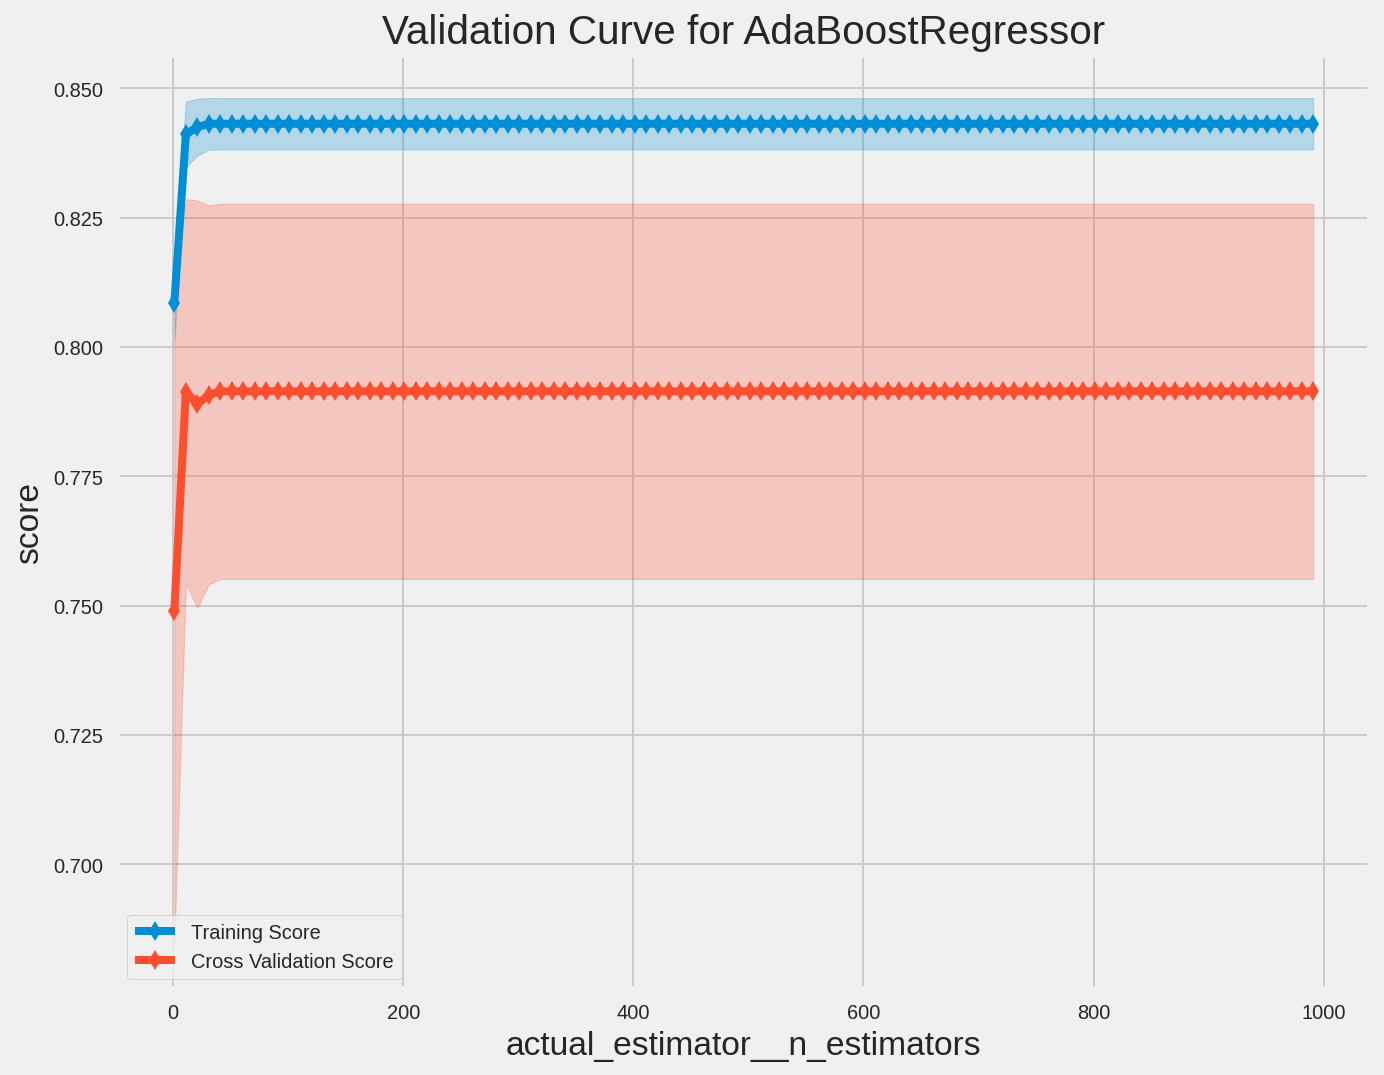

In [127]:
plot_model(ada,scale=2,plot='vc')

In [128]:
plot_model(ada,plot='parameter')

,Parameters
base_estimator,None
learning_rate,1.0
loss,linear
n_estimators,50
random_state,123


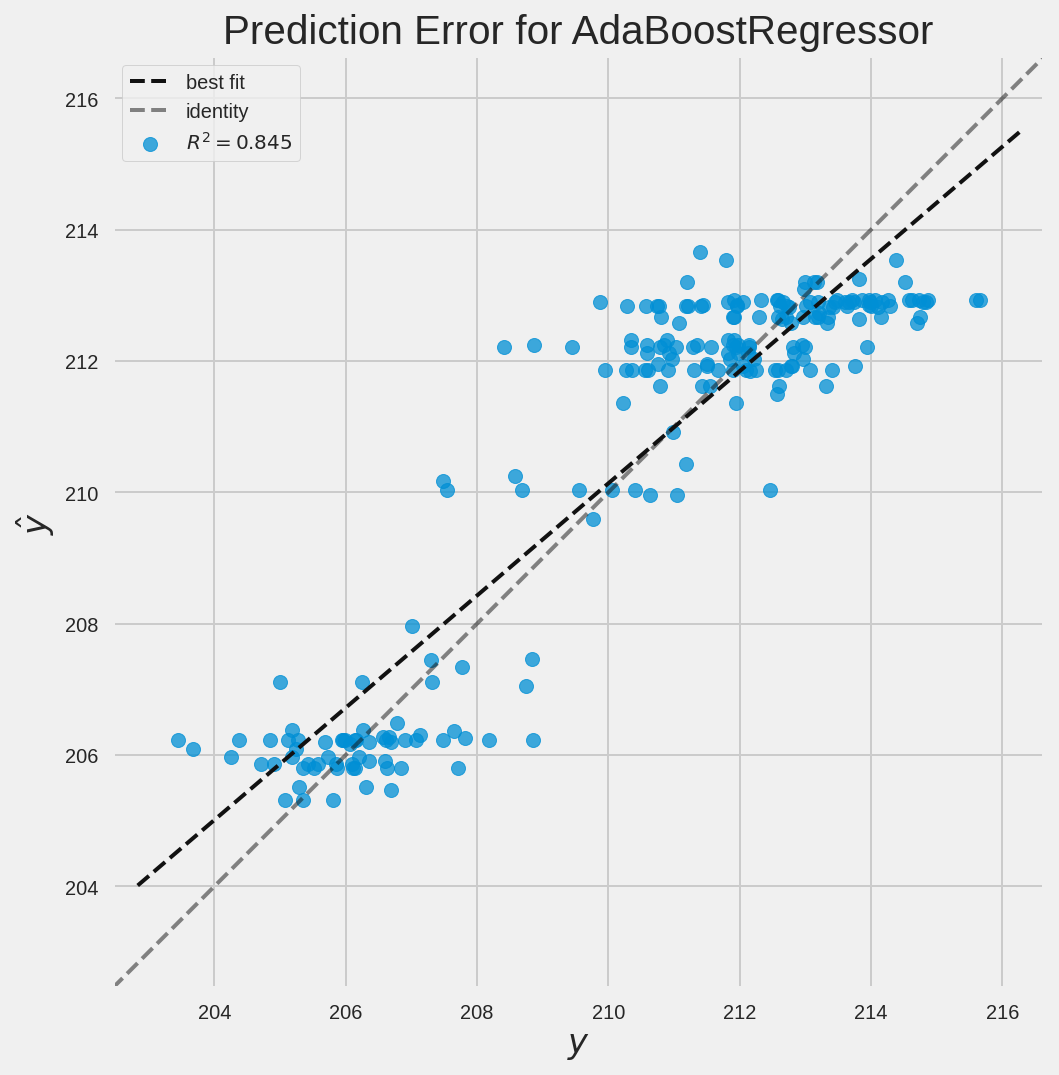

In [129]:
plot_model(ada,scale=2,plot='error')

In [130]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('PyCaret:  ML Model Creation.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/PyCaret:  ML Model Creation.ipynb to pdf
[NbConvertApp] Support files will be in PyCaret:  ML Model Creation_files/
[NbConvertApp] Making directory ./PyCaret:  ML Model Creation_files
[NbConvertApp] Making directory ./PyCaret:  ML Model Creation_files
[NbConvertApp] Making directory ./PyCaret:  ML Model Creation_files
[NbConvertApp] Making directory ./PyCaret:  ML Model Creation_files
[NbConvertApp] Making directory ./PyCaret:  ML Model Creation_files
[NbConvertApp] Making directory ./PyCaret:  ML Model Creation_files
[NbConvertApp] Making directory ./PyCaret:  ML Model Creation_files
[NbConvertApp] Making directory ./PyCaret:  ML Model Creation_files
[NbConvertApp] Writing 98911 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] CRITICAL | xelatex failed: [u'xe

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'

In [131]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 57 not upgraded.


In [132]:

!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-generic-recommended

!jupyter nbconvert --to pdf fileName.ipynb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-fonts-recommended is already the newest version (2017.20180305-1).
texlive-generic-recommended is already the newest version (2017.20180305-1).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 57 not upgraded.
[NbConvertApp] WARNING | pattern u'fileName.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevan